In [1]:
#data format library
import h5py

#numpy
import numpy as np
import pandas as pd
import numpy.ma as ma
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)
plt.rcParams["font.family"] = "Times New Roman"
# %matplotlib notebook
import sys
sys.path.append('/Users/gautam.sridhar/Documents/Repos/Markov_Fish/utils/')
import matplotlib.colors as pltcolors
import os
import copy
import clustering_methods as cl
import operator_calculations as op_calc
import delay_embedding as embed
import stats
import time
import simulation_functions as sfs

np.random.seed(42)

import importlib
importlib.reload(sfs)

<module 'simulation_functions' from '/Users/gautam.sridhar/Documents/Repos/Markov_Fish/utils/simulation_functions.py'>

In [1]:
## For Fig 3B, Fig 5E and Fig Suppl 8

In [2]:
path_to_filtered_data = '/Users/gautam.sridhar/Documents/Repos/ZebraBouts/Datasets/Full_Data/'
# f = h5py.File(path_to_filtered_data+'filtered_phdata7_condition_3.h5','r')
# f = h5py.File(path_to_filtered_data+'filtered_data_circ2.h5','r')
f = h5py.File(path_to_filtered_data+'filtered_jmpool_ex5_kin.h5','r')
lengths = np.array(f['MetaData/lengths_data'],dtype=int)
frameRate = np.array(f['MetaData/frameRate'])[0] #sampling frame rate
# fnames = np.array(f['MetaData/fnames_data'])
bouttypes= ma.array(f['bout_types'], dtype=int)
# # # # errmask = ma.array(f['MetaData/errmask'], dtype=int)
# stims = ma.array(f['stims'])
# ecs = ma.array(f['eye_convergence'])

# # # #shapes are n_fish, max_n_bouts,dim of variable
time_Bout = ma.array(f['times_bouts']) #raw times bouts
X_head = ma.array(f['head_pos'])
# # phi_raw = ma.array(f['orientation_raw'])
phi_smooth = ma.array(f['orientation_smooth'])
speeds_head = ma.array(f['speed_head'])
f.close()

In [3]:
time_Bout[time_Bout == 0] = ma.masked
X_head[X_head == 0] = ma.masked
phi_smooth[phi_smooth == 0] = ma.masked
speeds_head[phi_smooth.mask] = ma.masked

In [4]:
# condition_recs = np.array([[420,430],[95,107],[22,83],[83,95],[107,137],[410,420],[0,22],[137,206],[252,350],[206,221],[221,252],
#                            [350,410]])

# condition_labels = ['Light (5x5cm)','Light (1x5cm)','Looming(5x5cm)','Optomotor Response (1x5cm)','Optokinetic Response (5x5cm)',
#                     'Dark (5x5cm)','3 min Light<->Dark(5x5cm)','Prey Capture Param. (2.5x2.5cm)','Prey Capture Param. RW. (2.5x2.5cm)',
#                     'Prey Capture Rot.(2.5x2.5cm)','Prey capture Rot. RW. (2.5x2.5cm)','Light RW. (2.5x2.5cm)']

condition_labels = ['Light (5x5cm)','Light (1x5cm)','Looming(5x5cm)','ChasingDot coarsespeeds(5x5cm)','ChasingDot finespeeds(5x5cm)','Dark_Transitions(5x5cm)',
                    'Phototaxis','Optomotor Response (1x5cm)','Optokinetic Response (5x5cm)','Dark (5x5cm)','3 min Light<->Dark(5x5cm)',
                    'Prey Capture Param. (2.5x2.5cm)','Prey Capture Param. RW. (2.5x2.5cm)',
                    'Prey Capture Rot.(2.5x2.5cm)','Prey capture Rot. RW. (2.5x2.5cm)','Light RW. (2.5x2.5cm)']

condition_recs = np.array([[515,525],[160,172],[87,148],[43,60],[22,43],[60,87],
                           [202,232],[148,160],[172,202],[505,515],[0,22],
                           [232,301],[347,445],[301,316],[316,347],
                           [445,505]])

In [5]:
conditions = np.zeros((np.max(condition_recs),2),dtype='object')
for k in range(len(condition_recs)):
    t0,tf = condition_recs[k]
    conditions[t0:tf,0] = np.arange(t0,tf)
    conditions[t0:tf,1] = [condition_labels[k] for t in range(t0,tf)]

In [6]:
recs_remove = np.load('/Users/gautam.sridhar/Documents/Repos/ZebraBouts/Datasets/Full_Data/recs_remove.npy')

In [7]:
recs_remove = np.hstack([recs_remove, np.arange(22,60)])

In [8]:
print(recs_remove)

[ 90 260 264 270 276 352 358 364 375 381 383 392 398 404 410 416 422 427
 433 439 450 456 467 497  22  23  24  25  26  27  28  29  30  31  32  33
  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59]


In [9]:
conditions = np.delete(conditions, recs_remove,axis=0)

In [10]:
print(conditions)

[[0 '3 min Light<->Dark(5x5cm)']
 [1 '3 min Light<->Dark(5x5cm)']
 [2 '3 min Light<->Dark(5x5cm)']
 [3 '3 min Light<->Dark(5x5cm)']
 [4 '3 min Light<->Dark(5x5cm)']
 [5 '3 min Light<->Dark(5x5cm)']
 [6 '3 min Light<->Dark(5x5cm)']
 [7 '3 min Light<->Dark(5x5cm)']
 [8 '3 min Light<->Dark(5x5cm)']
 [9 '3 min Light<->Dark(5x5cm)']
 [10 '3 min Light<->Dark(5x5cm)']
 [11 '3 min Light<->Dark(5x5cm)']
 [12 '3 min Light<->Dark(5x5cm)']
 [13 '3 min Light<->Dark(5x5cm)']
 [14 '3 min Light<->Dark(5x5cm)']
 [15 '3 min Light<->Dark(5x5cm)']
 [16 '3 min Light<->Dark(5x5cm)']
 [17 '3 min Light<->Dark(5x5cm)']
 [18 '3 min Light<->Dark(5x5cm)']
 [19 '3 min Light<->Dark(5x5cm)']
 [20 '3 min Light<->Dark(5x5cm)']
 [21 '3 min Light<->Dark(5x5cm)']
 [60 'Dark_Transitions(5x5cm)']
 [61 'Dark_Transitions(5x5cm)']
 [62 'Dark_Transitions(5x5cm)']
 [63 'Dark_Transitions(5x5cm)']
 [64 'Dark_Transitions(5x5cm)']
 [65 'Dark_Transitions(5x5cm)']
 [66 'Dark_Transitions(5x5cm)']
 [67 'Dark_Transitions(5x5cm)']
 [68 '

In [11]:
X_head = np.delete(X_head, recs_remove, axis=0)
X_head[X_head == 0] = ma.masked

time_Bout = np.delete(time_Bout,recs_remove, axis=0)
time_Bout[time_Bout == 0] = ma.masked

phi_smooth = np.delete(phi_smooth, recs_remove, axis=0)
phi_smooth[phi_smooth == 0] = ma.masked
speeds_head = np.delete(speeds_head, recs_remove,axis=0)
speeds_head[phi_smooth.mask] = ma.masked

In [12]:
## Load symbolic sequences

path_to_filtered_data = '/Users/gautam.sridhar/Documents/Repos/ZebraBouts/Results/'
f = h5py.File(path_to_filtered_data + 'pool_ex8_PCs/kmeans_labels_K5_N1200_s8684.h5')
lengths_all = np.array(f['MetaData/lengths_data'], dtype=int)
labels_fish_allrec = ma.array(f['labels_fish'],dtype=int)
state_trajs = ma.array(f['state_trajs'])
f.close()

to_mask = 1300
labels_fish_allrec[labels_fish_allrec == to_mask] = ma.masked

# lengths_all = np.load('/Users/gautam.sridhar/Documents/Repos/ZebraBouts/Datasets/Full_Data/lengths_ex2_recordings.npy')
# lengths_all = lengths

In [13]:
to_mask = 1300

# maxL = np.max(lengths_all)
maxL = np.max(lengths_all)

labels_fish_allrec[labels_fish_allrec == to_mask] = ma.masked

# labels_fishrec = to_mask * ma.ones((len(recs_), maxL))
# labels_fishrec = labels_fish_allrec[recs_,:maxL+2]
# labels_fishrec = np.delete(labels_fishrec,4,0)

# labels_fishrec[labels_fishrec == to_mask] = ma.masked
labels_fish = labels_fish_allrec

# lengths_rem = np.delete(lengths_all, recs_remove)
lengths_rem = lengths_all

In [14]:
## Select Dataset
labels_all= ma.concatenate(labels_fish,axis=0)

In [15]:
P_ensemble = np.load('/Users/gautam.sridhar/Documents/Repos/ZebraBouts/Datasets/Full_Data/P_ensemble_ex8_N1200_s8684.npy')

In [16]:
from scipy.sparse import diags,identity,coo_matrix, csr_matrix
P_ensemble = csr_matrix(P_ensemble)

In [17]:
X_head = X_head[:,:maxL,:,:]

In [18]:
for i in range(X_head.shape[0]):
    if conditions[i,1] in condition_labels[11:]:
        ps = 365.
    else:
        ps = 170.
    print(i,conditions[i,1],ps)
    X_head[i] = X_head[i]/ps

0 3 min Light<->Dark(5x5cm) 170.0
1 3 min Light<->Dark(5x5cm) 170.0
2 3 min Light<->Dark(5x5cm) 170.0
3 3 min Light<->Dark(5x5cm) 170.0
4 3 min Light<->Dark(5x5cm) 170.0
5 3 min Light<->Dark(5x5cm) 170.0
6 3 min Light<->Dark(5x5cm) 170.0
7 3 min Light<->Dark(5x5cm) 170.0
8 3 min Light<->Dark(5x5cm) 170.0
9 3 min Light<->Dark(5x5cm) 170.0
10 3 min Light<->Dark(5x5cm) 170.0
11 3 min Light<->Dark(5x5cm) 170.0
12 3 min Light<->Dark(5x5cm) 170.0
13 3 min Light<->Dark(5x5cm) 170.0
14 3 min Light<->Dark(5x5cm) 170.0
15 3 min Light<->Dark(5x5cm) 170.0
16 3 min Light<->Dark(5x5cm) 170.0
17 3 min Light<->Dark(5x5cm) 170.0
18 3 min Light<->Dark(5x5cm) 170.0
19 3 min Light<->Dark(5x5cm) 170.0
20 3 min Light<->Dark(5x5cm) 170.0
21 3 min Light<->Dark(5x5cm) 170.0
22 Dark_Transitions(5x5cm) 170.0
23 Dark_Transitions(5x5cm) 170.0
24 Dark_Transitions(5x5cm) 170.0
25 Dark_Transitions(5x5cm) 170.0
26 Dark_Transitions(5x5cm) 170.0
27 Dark_Transitions(5x5cm) 170.0
28 Dark_Transitions(5x5cm) 170.0
29 Dark_T

In [19]:
print(X_head.shape)

(463, 11651, 175, 2)


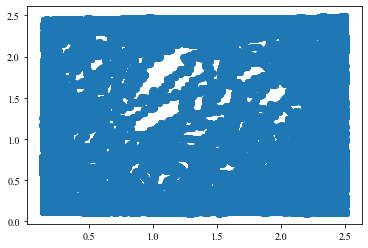

In [20]:
plt.scatter(X_head[232,:,:,0],X_head[232,:,:,1])

### Simulations from fish in large arenas - Fig S8

In [71]:
conds = [0,1,2,3,4,5,6,9,10]
cond_recs = []
for c in conds:
    cond_recs.extend(np.where(conditions[:,1] == condition_labels[c])[0])

In [72]:
# pca_pose = pca_fish[krec0:krec1,:,:20].copy()

X = ma.vstack(X_head[cond_recs].copy())

vecX = ma.diff(X[:,0,:],axis=0)
dist = ma.zeros(X.shape[0])
dist[:-1] = ma.sqrt(vecX[:,0]**2+vecX[:,1]**2)
dist[-1] = ma.masked 

psi = ma.zeros(X.shape[0])
psi[:-1] = ma.arctan2(vecX[:,1],vecX[:,0])
psi[-1] = ma.masked

psi_unwrap = sfs.unwrapma(psi)
dpsi = ma.zeros(X.shape[0])
dpsi[:-1] = psi_unwrap[1:]-psi_unwrap[:-1]
dpsi[-1:] = ma.masked

In [73]:
psi_fish = psi.reshape((X_head[cond_recs].shape[0], X_head[cond_recs].shape[1]))

In [74]:
labels_cond = ma.hstack(labels_fish[cond_recs])

In [75]:
lookup_table = {}
for state in np.unique(labels_cond.compressed()):
    mask = labels_cond==state
    lookup_table[state] = np.arange(len(labels_cond))[mask]

In [76]:
rec_X_traj = []

for i,c in enumerate(cond_recs):
    labels = labels_fish[c]
    print(i)
    dpsi_rec = np.array([dpsi[lookup_table[s][np.random.randint(0,len(lookup_table[s]))]] for s in labels.compressed()])
    dist_rec = np.array([dist[lookup_table[s][np.random.randint(0,len(lookup_table[s]))]] for s in labels.compressed()])
    rec_X_traj.append(sfs.rec_trajectory(dpsi_rec,dist_rec,psi_fish[i,0],X_head[cond_recs][i,0,0]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170


In [77]:
## Simulate from ensemble operator
labels_cond = ma.concatenate(labels_fish[cond_recs], axis=0)
lcs_cond, P_cond = op_calc.transition_matrix(labels_cond,delay=3,return_connected=True)
sims = sfs.get_sims_ensemble(labels_cond, P_cond,n_sims=1000, len_sim=1000)

(1200,)


In [78]:
print(len(sims))

1000


In [79]:
xmin=0
xmax = 5.0
sims_X_traj = []
sims_X_traj_refl = []
for i, sim in enumerate(sims):
    print(i)
    dpsi_sim = np.array([dpsi[lookup_table[s][np.random.randint(0,len(lookup_table[s]))]] for s in sim])
    dist_sim = np.array([dist[lookup_table[s][np.random.randint(0,len(lookup_table[s]))]] for s in sim])
    sims_X_traj.append(ma.array(sfs.rec_trajectory(dpsi_sim,dist_sim,np.random.choice(psi_fish[:,0]),[0,0])))
    sims_X_traj_refl.append(ma.array(sfs.rec_trajectory_reflective(dpsi_sim,dist_sim,np.random.choice(psi_fish[:,0]),[0.4,0.4],xmin,xmax)))

0
! [4.94795045 4.8867283 ] [5.04890123 5.07183452] [4.84699967 5.07183452]
fixed [4.84699967 4.92816548]
! [0.32333528 0.23237956] [-0.03618334 -0.0292592 ] [ 0.6828539 -0.0292592]
fixed [0.6828539 0.0292592]
1
2
! [4.43589705 0.08042952] [ 5.09820636 -0.98214572] [ 3.77358775 -0.98214572]
fixed [3.77358775 0.98214572]
! [4.94927621 0.04359875] [ 5.03300605 -0.15081477] [ 4.86554637 -0.15081477]
fixed [4.86554637 0.15081477]
3
! [0.21192554 0.07162501] [-0.04011577 -0.10259176] [ 0.46396684 -0.10259176]
fixed [0.46396684 0.10259176]
! [0.48133719 0.01813433] [-0.19852503 -0.69985959] [ 1.1611994  -0.69985959]
fixed [1.1611994  0.69985959]
4
5
! [0.1247332  0.01645509] [-0.09698243 -0.26135833] [ 0.34644883 -0.26135833]
fixed [0.34644883 0.26135833]
! [4.76555791 3.89871266] [5.08653638 5.0859964 ] [4.44457944 5.0859964 ]
fixed [4.44457944 4.9140036 ]
6
! [0.03489322 0.21772392] [-0.16376837 -0.06462581] [ 0.2335548  -0.06462581]
fixed [0.2335548  0.06462581]
! [4.97093889 4.84079196] 

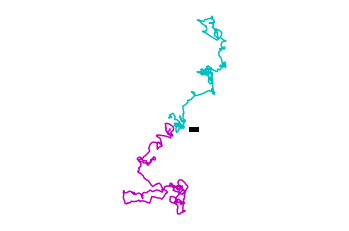

In [90]:
idx = 13
# print(len(rec_X_traj[idx]))
# plt.figure(figsize=(5,5))
# plt.plot(X_head[cond_recs][idx][0:500,0,0],X_head[cond_recs][idx][0:500,0,1],c='k')#, c=np.arange(len(rec_X_traj[sims_fishnum[idx]])), cmap='viridis', s=10)
# plt.plot([4,5],[0,0],lw=5,c='k')
# plt.axis('equal')
# plt.axis('off')

plt.plot(rec_X_traj[idx][:500,0],rec_X_traj[idx][:500,1],c='c')#, c=np.arange(len(rec_X_traj[sims_fishnum[idx]])), cmap='viridis', s=10)
plt.axis('equal')
plt.axis('off')
plt.plot([4,5],[0,0],lw=5,c='k')

plt.plot(sims_X_traj[idx][:500,0],sims_X_traj[idx][:500,1],c='m')# ,c=np.arange(len(sims_X_traj[idx])), cmap='viridis', s=10)
plt.axis('equal')
plt.axis('off')
plt.plot([4,5],[0,0],lw=5,c='k')
# plt.plot(sims_X_traj_refl[idx][:500,0],sims_X_traj_refl[idx][:500,1],c='brown')# ,c=np.arange(len(sims_X_traj_refl[idx])), cmap='viridis', s=10)
# plt.axis('equal')
# plt.axis('off')
# plt.plot([4,5],[0,0],lw=5,c='k')
# plt.savefig('/Users/gautam.sridhar/Documents/ZENITH/Figures/Suppl8/new_trajs.pdf')
plt.show()

In [85]:
lags = np.arange(0,500)
realdat_msds = []
for i in cond_recs:
    print(i)
    realdat_msd,_ = sfs.MSD_unc(X_head[i,:,0,:],lags)
    realdat_msds.append(realdat_msd)

453
454
455
456
457
458
459
460
461
462
121
122
123
124
125
126
127
128
129
130
131
132
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
443
444
445
446
447
448
449
450
451
452
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [86]:
lags = np.arange(0,500)
rec_msds = []
sim_msds = []
refls_msds = []
for i in range(len(rec_X_traj)):
    print(i)
    rec_msd,_ = sfs.MSD_unc(rec_X_traj[i],lags)
    rec_msds.append(rec_msd)

for i in range(len(sims_X_traj)):
    print(i)
    sim_msd,_ = sfs.MSD_unc(sims_X_traj[i],lags)
    sim_msds.append(sim_msd)
    refl_msd,_ = sfs.MSD_unc(sims_X_traj_refl[i],lags)
    refls_msds.append(refl_msd)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133


<ipython-input-89-407feffc708d>:7: RuntimeWarning: divide by zero encountered in log
  local_slope_real = np.diff(np.log(mean))/np.diff(np.log(lags))
<ipython-input-89-407feffc708d>:12: RuntimeWarning: divide by zero encountered in log
  local_slope_sim = np.diff(np.log(mean))/np.diff(np.log(lags))
<ipython-input-89-407feffc708d>:17: RuntimeWarning: divide by zero encountered in log
  local_slope_dat = np.diff(np.log(mean))/np.diff(np.log(lags))
<ipython-input-89-407feffc708d>:22: RuntimeWarning: divide by zero encountered in log
  local_slope_dat = np.diff(np.log(mean))/np.diff(np.log(lags))


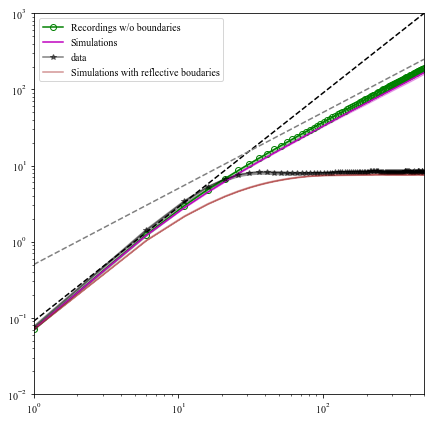

In [89]:
plt.figure(figsize=(7,7))

plt.plot(lags[1:], 0.09*lags[1:]**1.5,c='k',ls='--')
plt.plot(lags[1:], 0.5*lags[1:]**1.,c='gray',ls='--')

mean,cil,ciu = stats.bootstrap(rec_msds,n_times=100, n_samples=len(rec_msds))
local_slope_real = np.diff(np.log(mean))/np.diff(np.log(lags))
plt.plot(lags[1::5],mean[1::5],alpha=1.,label='Recordings w/o boundaries', c='green', fillstyle='none',marker='o')
plt.fill_between(lags[1::5],cil[1::5],ciu[1::5],alpha=.3, color='green')

mean,cil,ciu = stats.bootstrap(sim_msds,n_times=100,n_samples=len(sim_msds))
local_slope_sim = np.diff(np.log(mean))/np.diff(np.log(lags))
plt.plot(lags[1::5],mean[1::5],alpha=1.,label='Simulations',c='m')
plt.fill_between(lags[1::5],cil[1::5],ciu[1::5],alpha=.3, color='m')

mean,cil,ciu = stats.bootstrap(realdat_msds,n_times=100,n_samples=len(realdat_msds))
local_slope_dat = np.diff(np.log(mean))/np.diff(np.log(lags))
plt.plot(lags[1::5],mean[1::5],marker='*',label='data',c='k', alpha=0.5)
plt.fill_between(lags[1::5],cil[1::5],ciu[1::5],color='k',alpha=.3)

mean,cil,ciu = stats.bootstrap(refls_msds,n_times=100, n_samples=len(refls_msds))
local_slope_dat = np.diff(np.log(mean))/np.diff(np.log(lags))
plt.plot(lags[1::5],mean[1::5],alpha=0.5,label='Simulations with reflective boudaries',c='brown')
plt.fill_between(lags[1::5],cil[1::5],ciu[1::5],alpha=.5,color='brown')
plt.xlim(1,500)
plt.ylim(0.01,1000)
plt.xscale('log')
plt.yscale('log')
plt.savefig('/Users/gautam.sridhar/Documents/ZENITH/Figures/Suppl8/MSD_refl_new.pdf')
# plt.xlim(0,30)
plt.legend()

### Checking Metastable state significance Fig 3B

In [91]:
# Perform coherence based split on whole dataset
# np.random.seed(25)
import msmtools.estimation as msm_estimation
delay = 3
dt = 1
print(delay)
# lcs_ensemble,P_ensemble = op_calc.transition_matrix(labels_all,delay,return_connected=True)
lcs_ensemble = msm_estimation.largest_connected_set(P_ensemble)
inv_measure = op_calc.stationary_distribution(P_ensemble)
final_labels = op_calc.get_connected_labels(labels_all,lcs_ensemble)
R = op_calc.get_reversible_transition_matrix(P_ensemble)
eigvals,eigvecs = op_calc.sorted_spectrum(R,k=10,seed=43)
sorted_indices = np.argsort(eigvals.real)[::-1]
eigvals = eigvals[sorted_indices][1:].real
eigvals[np.abs(eigvals-1)<1e-12] = np.nan
eigvals[eigvals<1e-12] = np.nan
t_imp =  -(delay*dt)/np.log(np.abs(eigvals))

3


In [92]:
kms2 = np.load('/Users/gautam.sridhar/Documents/Repos/ZebraBouts/Results/pool_ex8_PCs/cg4_labels.npy')

In [93]:
final_labels_recs = final_labels.reshape(labels_fish.shape)
kmeans_labels_traj = ma.masked_invalid(kms2[final_labels])
kmeans_labels_traj[final_labels.mask] = ma.masked

In [94]:
cluster_traj_all = ma.copy(final_labels)
cluster_traj_all[~final_labels.mask] = ma.array(kms2)[final_labels[~final_labels.mask]]
cluster_traj_all[final_labels.mask] = ma.masked

# cluster_fish = cluster_traj_all.reshape(12,4836)
cluster_fish = cluster_traj_all.reshape(labels_fish.shape[0],labels_fish.shape[1])
cluster_fish_mask = cluster_fish.mask
# dtrajs_fish_ = distort_traj.reshape(labels_fish.shape[0],labels_fish.shape[1])

In [95]:
kmeans_labels_traj.shape,labels_all.shape

((5394413,), (5394413,))

In [96]:
state_measures = [(inv_measure[kms2==state]).sum() for state in np.unique(kms2)]
print(state_measures)

[0.2833517565833632, 0.2382684726040758, 0.28346719973433987, 0.19491257107822108]


In [97]:
# pca_pose = pca_fish[krec0:krec1,:,:20].copy()

X = ma.vstack(X_head.copy())

vecX = ma.diff(X[:,0,:],axis=0)
dist = ma.zeros(X.shape[0])
dist[:-1] = ma.sqrt(vecX[:,0]**2+vecX[:,1]**2)
dist[-1] = ma.masked 

psi = ma.zeros(X.shape[0])
psi[:-1] = ma.arctan2(vecX[:,1],vecX[:,0])
psi[-1] = ma.masked

psi_unwrap = sfs.unwrapma(psi)
dpsi = ma.zeros(X.shape[0])
dpsi[:-1] = psi_unwrap[1:]-psi_unwrap[:-1]
dpsi[-1:] = ma.masked

In [98]:
psi_fish = psi.reshape((X_head[:].shape[0], X_head[:].shape[1]))

In [99]:
print(labels_fish.shape)
print(labels_all.shape)

(463, 11651)
(5394413,)


In [100]:
importlib.reload(sfs)

<module 'simulation_functions' from '/Users/gautam.sridhar/Documents/Repos/Markov_Fish/utils/simulation_functions.py'>

In [101]:
sims = []
sims_X_trajs = []
n_sims = 5000
len_sim = 1000
for ms in np.unique(kms2):
    print(ms)
    sim,sim_X_traj = sfs.get_sims_state(ms,labels_fish,kmeans_labels_traj,np.random.choice(psi_fish[:,0]), dpsi, dist, [0,0],
                                     n_sims=n_sims, len_sim=len_sim)
    sims.append(sim)
    sims_X_trajs.append(sim_X_traj)

0
(396,)
1
(354,)
2
(304,)
3
(146,)


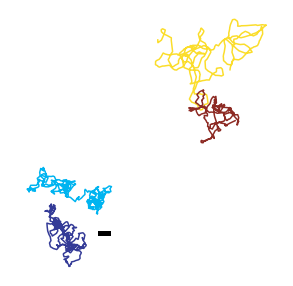

In [103]:
st_colors = ['#343B97', '#00B4F0', '#FBDD2B', '#8D2B24']
idx =130
fig, ax = plt.subplots(1,1,figsize=(5,5))
for ms in [0,1,2,3]:
    if ms == 0:
        x_off,y_off = 0,0
    elif ms == 1:
        x_off,y_off = 5,5
    elif ms == 2:
        x_off,y_off = 20,20
    elif ms == 3:
        x_off,y_off = 15,15
    
    plt.plot(x_off + sims_X_trajs[ms][idx][:500,0],y_off+sims_X_trajs[ms][idx][:500,1], c=st_colors[ms])#c=np.arange(1000), cmap='viridis', s=10)
ax.plot([4,5],[0,0],lw=5,c='k')
plt.axis('equal')
plt.axis('off')
# plt.savefig('/Users/gautam.sridhar/Documents/ZENITH/Figures/Fig6/MS_sim_traj.pdf')
plt.show()
# for ms in np.unique(km.labels_):
#     plt.plot(sims_X_trajs[ms][idx][:1000,0],sims_X_trajs[ms][idx][:1000,1], c=st_colors[ms])#c=np.arange(1000), cmap='viridis', s=10)
#     plt.axis('equal')
#     plt.show()

In [104]:
lags = np.arange(0,500)
mus_sim=[[],[],[],[]]
for ms in np.unique(kms2):
    print(ms)
    for k in range(n_sims):
        mu,Unc = sfs.MSD_unc(sims_X_trajs[ms][k],lags)
        mus_sim[ms].append(mu)

0
1
2
3


0


<ipython-input-121-3ae40e3de153>:8: RuntimeWarning: divide by zero encountered in log
  local_slope = np.diff(np.log(mean))/np.diff(np.log(lags))


1


<ipython-input-121-3ae40e3de153>:8: RuntimeWarning: divide by zero encountered in log
  local_slope = np.diff(np.log(mean))/np.diff(np.log(lags))


2


<ipython-input-121-3ae40e3de153>:8: RuntimeWarning: divide by zero encountered in log
  local_slope = np.diff(np.log(mean))/np.diff(np.log(lags))


3


<ipython-input-121-3ae40e3de153>:8: RuntimeWarning: divide by zero encountered in log
  local_slope = np.diff(np.log(mean))/np.diff(np.log(lags))


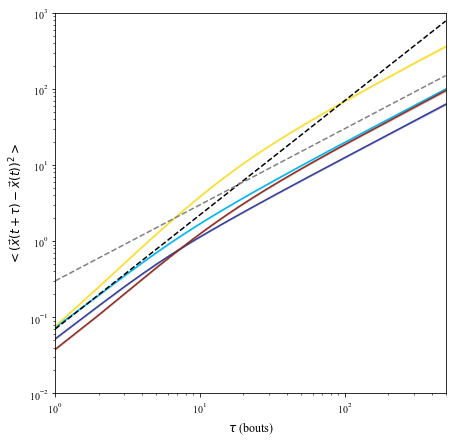

In [121]:
plt.figure(figsize=(7,7))

local_slopes =[]

for ms in np.unique(kms2):
    print(ms)
    mean,cil,ciu = stats.bootstrap(mus_sim[ms],n_times=100, n_samples=len(mus_sim[ms]))
    local_slope = np.diff(np.log(mean))/np.diff(np.log(lags))
    local_slopes.append(local_slope)
    plt.plot(lags[1:],mean[1:],c=st_colors[ms])
    plt.fill_between(lags[1:],cil[1:],ciu[1:],alpha=.3,color=st_colors[ms])

plt.plot(lags[1:], 0.07*lags[1:]**1.5,c='k',ls='--')
plt.plot(lags[1:], 0.3*lags[1:]**1.,c='gray',ls='--')
plt.xlim(1,500)
plt.xscale('log')
plt.yscale('log')
# plt.ylim(0.1,1)
# plt.xlim(0,15)
plt.ylim(0.01,1000)
plt.xlabel(r'$\tau$ (bouts)',fontsize=12)
plt.ylabel(r'$<(\vec{x}(t+\tau)-\vec{x}(t))^2>$',fontsize=12)
plt.savefig('/Users/gautam.sridhar/Documents/ZENITH/Figures/Suppl8/MSD_metastates.pdf')
# plt.legend()
# plt.axis('equal')
plt.show()

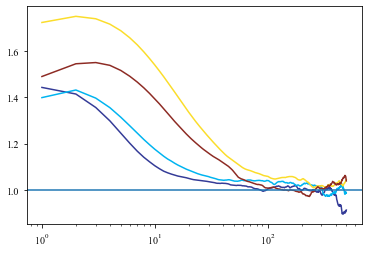

In [76]:
for ms in np.unique(kms2):
    plt.plot(local_slopes[ms], color=st_colors[ms])
    plt.xscale('log')
plt.axhline(1.0)
plt.show()

### Probability of gathering food source

In [159]:
#body length_regime - for exploration
rmin=0.8
maxR = 100.
dr= .4
xrange,yrange,rads = sfs.get_bins(dr,maxR)

In [160]:
dist_range = np.logspace(np.log10(rmin),np.log10(maxR),50)
# dist_range = np.linspace(rmin, maxR,30)
print(dist_range)
# print(drs)

[  0.8          0.8828442    0.97426735   1.07515786   1.1864961
   1.309364     1.44495552   1.59458825   1.75971624   1.9419441
   2.14304261   2.36496593   2.60987057   2.88013637   3.17838962
   3.50752856   3.87075156   4.27158821   4.7139336    5.20208619
   5.74078953   6.33527844   6.99132979   7.71531871   8.51428048
   9.39597893  10.3689819   11.44274443  12.62770071  13.93536544
  15.37844571  16.97096453  18.72839704  20.66782091  22.80808231
  25.16997901  27.77646253  30.6528611   33.82712585  37.33010238
  41.19583053  45.46187514  50.16969106  55.36502605  61.09836527
  67.42542186  74.4076784   82.11298427  90.61621504 100.        ]


In [161]:
ac_samples_state = []
for ms in np.unique(kms2):
    print(ms)
    ac_samples= np.zeros((n_sims,len(dist_range)))
    for k in range(n_sims):
        ksim=np.random.randint(0,n_sims)
        xy_all = sims_X_trajs[ms][ksim]
        freqs,_,_= np.histogram2d(xy_all[:,0],xy_all[:,1],bins=[xrange,yrange])
        for kd,ds in enumerate(dist_range):
            sel = rads<=ds
            ac_samples[k,kd] = (freqs[sel]>0).sum()/sel.sum()
    ac_samples_state.append(ac_samples)

0
1
2
3


In [162]:
ac_samples_state = np.asarray(ac_samples_state)
ac_samples_ratio = (ac_samples_state/np.sum(ac_samples_state,axis=0))
ac_avg_fish = np.sum([ac_samples_ratio[ms]*state_measures[ms] for ms in np.unique(kms2)],axis=0)

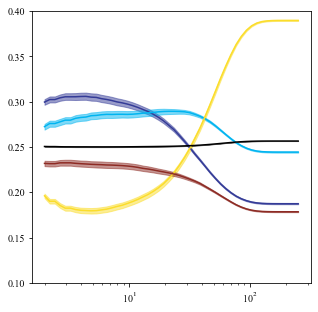

In [163]:
plt.figure(figsize=(5,5))
for ms in np.unique(kms2):
    ac_samples = (ac_samples_state/np.sum(ac_samples_state,axis=0))[ms]
    mean,cil,ciu = stats.bootstrap(ac_samples,n_times=1000, n_samples=len(ac_samples))
    plt.plot(dist_range/0.4,mean, c=st_colors[ms])
    plt.fill_between(dist_range/0.4,cil,ciu,alpha=.5, color=st_colors[ms])

mean,cil,ciu = stats.bootstrap(ac_avg_fish,n_times=100, n_samples=len(ac_avg_fish))
plt.plot(dist_range/0.4,mean,c='k')
plt.fill_between(dist_range/0.4,cil,ciu,alpha=.5,color='k')
plt.ylim(0.1,.4)
plt.xscale('log')
# plt.yscale('log')
plt.savefig('/Users/gautam.sridhar/Documents/ZENITH/Figures/Fig6/p_res_gen.pdf')

In [148]:
rmin=0.0
maxR = .2
dr= .02
# xrange,yrange,rads = get_bins(dr,maxR)
xrange,yrange,rads,angs = sfs.get_bins_angs(dr,maxR)
psi_range = np.array([-np.pi/6, np.pi/6])
sel1 = angs >= psi_range.min()
sel2 = angs <= psi_range.max()
sel = np.logical_and(sel1,sel2)

ac_samples_state = []
for ms in np.unique(kms2):
    print(ms)
    ac_samples= np.zeros((n_sims,))
    for k in range(n_sims):
        ksim=np.random.randint(0,n_sims)
        xy_all = sims_X_trajs[ms][ksim]
        vec0 = xy_all[1] - xy_all[0]
        psi0 = np.arctan2(vec0[1],vec0[0])
        xy_all = xy_all[1:]-xy_all[1]
        xy_all_ = np.dot(xy_all,sfs.rot(psi0))
        freqs,_,_= np.histogram2d(xy_all_[:10,0],xy_all_[:10,1],bins=[xrange,yrange])
        ac_samples[k] = (freqs.T[sel]>0).sum()/sel.sum()
    ac_samples_state.append(ac_samples)

ac_samples_state = np.asarray(ac_samples_state)

0
1
2
3


In [149]:
# plt.figure(figsize=(5,5))
means = []
cus = []
clls = []
for ms in np.unique(kms2):
    ac_samples = (ac_samples_state/np.sum(ac_samples_state,axis=0))[ms]
    ac_samples = ma.masked_invalid(ac_samples)
    mean,cil,ciu = stats.bootstrap(ac_samples,n_times=100, n_samples=len(ac_samples))
    means.append(mean)
    clls.append(cil)
    cus.append(ciu)

<ipython-input-149-e558efbae3d4>:6: RuntimeWarning: invalid value encountered in true_divide
  ac_samples = (ac_samples_state/np.sum(ac_samples_state,axis=0))[ms]
/Users/gautam.sridhar/zilo/lib/python3.8/site-packages/numpy/ma/core.py:2825: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


In [150]:
print(means)
print(clls)
print(cus)

[0.22135670319264067, 0.13483702350889848, 0.18642366747835498, 0.45738260582010587]
[masked_array(data=[0.2137003890372892],
             mask=[False],
       fill_value=1e+20), masked_array(data=[0.12659522122738817],
             mask=[False],
       fill_value=1e+20), masked_array(data=[0.17752443666769951],
             mask=[False],
       fill_value=1e+20), masked_array(data=[0.44766917221844255],
             mask=[False],
       fill_value=1e+20)]
[masked_array(data=[0.23111876426537542],
             mask=[False],
       fill_value=1e+20), masked_array(data=[0.143575132687577],
             mask=[False],
       fill_value=1e+20), masked_array(data=[0.1960131298229071],
             mask=[False],
       fill_value=1e+20), masked_array(data=[0.46952865122605403],
             mask=[False],
       fill_value=1e+20)]


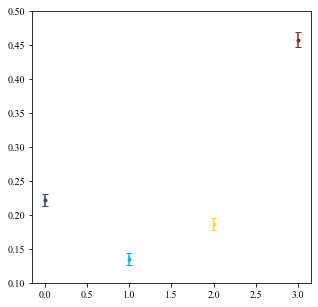

In [158]:
cus = ma.hstack(cus)
clls = ma.hstack(clls)
means = ma.hstack(means)
fig,ax = plt.subplots(1,1,figsize=(5,5))
for ms in np.unique(kms2):
    m = means[ms]
    cil = clls[ms]
    ciu = cus[ms]
    ax.errorbar(ms, m, [[m - cil],[ciu-m]],fmt='.', capsize=3,  color=st_colors[ms])
plt.ylim(0.1,0.5)
plt.savefig('/Users/gautam.sridhar/Documents/ZENITH/Figures/Fig6/p_res_gs_pc.pdf')

### Checking Behavioral group significance Fig 5E

In [105]:
tmspace_clusters = np.load('/Users/gautam.sridhar/Documents/Repos/ZebraBouts/Datasets/Full_Data/spectral_split_g7.npy')

In [106]:
post_f = np.load('/Users/gautam.sridhar/Documents/ZENITH/Figures/posterior_f.npy')

In [744]:
P_prj = ma.zeros((labels_fish.shape[0],1200,1200))
lcs_all = []

# C_prj = ma.zeros((labels_fish.shape[0],1200,1200))
# lcs_all = []
# for cf in range(labels_fish.shape[0]):
#     print(cf)
#     C_spec = op_calc.get_count_ms([labels_fish[cf].compressed()],delay=1,nstates=1200)
#     lcs_spec = msm_estimation.largest_connected_set(C_spec)
#     lcs_all.append(lcs_spec.astype(int))
#     C_prj[cf] = C_spec.todense()
for cf in range(labels_fish.shape[0]):
    print(cf)
    lcs_spec,P_spec = op_calc.transition_matrix(labels_fish[cf],delay=1, return_connected=True)
    lcs_all.append(lcs_spec.astype(int))
    for i,l in enumerate(lcs_spec):
        P_prj[cf, l,lcs_spec] = P_spec.todense()[i]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [502]:
P_gs = np.zeros((7,1200,1200))
lcs_gs = []
for g in range(7):
    cluster_idx = np.asarray(np.where(tmspace_clusters == g)[0], dtype=int)
    labels_group = ma.hstack(labels_fish[cluster_idx])
    lcs_g,P_g = op_calc.transition_matrix(labels_group,delay=1,return_connected=True)
    lcs_gs.append(lcs_g)
    for i,l in enumerate(lcs_g):
        P_gs[g, l,lcs_g] = P_g.todense()[i]

P_gs2 = []
for g in range(7):
    P_g = np.zeros((1200,1200))
    for cf in range(463):
        P_g += post_f[cf,g]*P_prj[cf]
    row_sums = P_g.sum(axis=1)
    P_gs2.append(P_g / row_sums[:, np.newaxis])

In [526]:
X = ma.vstack(X_head[:].copy())

vecX = ma.diff(X[:,0,:],axis=0)
dist = ma.zeros(X.shape[0])
dist[:-1] = ma.sqrt(vecX[:,0]**2+vecX[:,1]**2)
dist[-1] = ma.masked 

psi = ma.zeros(X.shape[0])
psi[:-1] = ma.arctan2(vecX[:,1],vecX[:,0])
psi[-1] = ma.masked

psi_unwrap = sfs.unwrapma(psi)
dpsi = ma.zeros(X.shape[0])
dpsi[:-1] = psi_unwrap[1:]-psi_unwrap[:-1]
dpsi[-1:] = ma.masked

psi_clus = psi_unwrap.reshape(X_head[:].shape[0],X_head[:].shape[1])

In [791]:
importlib.reload(sfs)

<module 'simulation_functions' from '/Users/gautam.sridhar/Documents/Repos/Markov_Fish/utils/simulation_functions.py'>

In [528]:
lookup_table = {}
for state in np.unique(labels_all.compressed()):
    mask = labels_all==state
    lookup_table[state] = np.arange(len(labels_all))[mask]

In [805]:
sims_gs = []
sims_gs_X_trajs = []
n_sims = 5000
len_sim = 1000

for clus in [0,1,2,3,4,5,6]:
    print(clus)
    fish_idx = np.arange(0,463)
    cluster_idx = np.asarray(np.where(tmspace_clusters == clus)[0], dtype=int)
    fish_idx = np.delete(fish_idx,cluster_idx)
    print(cluster_idx)
    sim_gs,sims_gs_X_traj = sfs.get_sims_group2(labels_fish,lookup_table,fish_idx,dpsi,dist,np.random.choice(psi_clus[:,0]), [0,0],
                                     n_sims=n_sims, len_sim=len_sim)
    sims_gs.append(sim_gs)
    sims_gs_X_trajs.append(sims_gs_X_traj)

0
[  2   3   4   5  15  16  17  18  19  21  23  24  25  26  27  28  29  30
  37  38  40  41  42  44  45  46  48  52  58  59  60  61  62  64  65  70
  71  75  76  78  81  82  83  92  93  94  95  96  97  99 102 103 108 114
 122 125 126 128 132 164 168 176 178 189 191 192 196 213 255 256 257 287
 421 422 423 444 446 448 457]
[  0   1   6   7   8   9  10  11  12  13  14  20  22  31  32  33  34  35
  36  39  43  47  49  50  51  53  54  55  56  57  63  66  67  68  69  72
  73  74  77  79  80  84  85  86  87  88  89  90  91  98 100 101 104 105
 106 107 109 110 111 112 113 115 116 117 118 119 120 121 123 124 127 129
 130 131 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 165 166 167
 169 170 171 172 173 174 175 177 179 180 181 182 183 184 185 186 187 188
 190 193 194 195 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 23

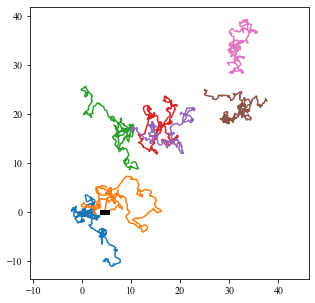

In [830]:
idx =300
fig, ax = plt.subplots(1,1,figsize=(5,5))
for clus in [0,1,2,3,4,5,6]:
    if clus == 0:
        x_off,y_off = 0,0
    elif clus == 1:
        x_off,y_off = 5,5
    elif clus == 2:
        x_off,y_off = 10,10
    elif clus == 3:
        x_off,y_off = 15,15
    elif clus == 4:
        x_off,y_off = 20,20
    elif clus == 5:
        x_off,y_off = 25,25
    elif clus == 6:
        x_off,y_off = 30,30
    
    plt.plot(x_off + sims_gs_X_trajs[clus][idx][:500,0],x_off + sims_gs_X_trajs[clus][idx][:500,1], c='C{}'.format(clus))#c=np.arange(1000), cmap='viridis', s=10)
ax.plot([4,5],[0,0],lw=5,c='k')
plt.axis('equal')
# plt.axis('off')
# plt.savefig('/Users/gautam.sridhar/Documents/ZENITH/Figures/Fig6/group_sim_traj.pdf')
plt.show()
# for ms in np.unique(km.labels_):
#     plt.plot(sims_X_trajs[ms][idx][:1000,0],sims_X_trajs[ms][idx][:1000,1], c=st_colors[ms])#c=np.arange(1000), cmap='viridis', s=10)
#     plt.axis('equal')
#     plt.show()

In [831]:
lags = np.arange(0,500)
mus_sim=[[],[],[],[],[],[],[]]
for clus in [0,1,2,3,4,5,6]:
    print(clus)
    for k in range(n_sims):
        mu,Unc =sfs.MSD_unc(sims_gs_X_trajs[clus][k],lags)
        mus_sim[clus].append(mu)

0
1
2
3
4
5
6


0


<ipython-input-832-e15b8407d108>:8: RuntimeWarning: divide by zero encountered in log
  local_slope = np.diff(np.log(mean))/np.diff(np.log(lags))


1


<ipython-input-832-e15b8407d108>:8: RuntimeWarning: divide by zero encountered in log
  local_slope = np.diff(np.log(mean))/np.diff(np.log(lags))


2


<ipython-input-832-e15b8407d108>:8: RuntimeWarning: divide by zero encountered in log
  local_slope = np.diff(np.log(mean))/np.diff(np.log(lags))


3


<ipython-input-832-e15b8407d108>:8: RuntimeWarning: divide by zero encountered in log
  local_slope = np.diff(np.log(mean))/np.diff(np.log(lags))


4


<ipython-input-832-e15b8407d108>:8: RuntimeWarning: divide by zero encountered in log
  local_slope = np.diff(np.log(mean))/np.diff(np.log(lags))


5


<ipython-input-832-e15b8407d108>:8: RuntimeWarning: divide by zero encountered in log
  local_slope = np.diff(np.log(mean))/np.diff(np.log(lags))


6


<ipython-input-832-e15b8407d108>:8: RuntimeWarning: divide by zero encountered in log
  local_slope = np.diff(np.log(mean))/np.diff(np.log(lags))


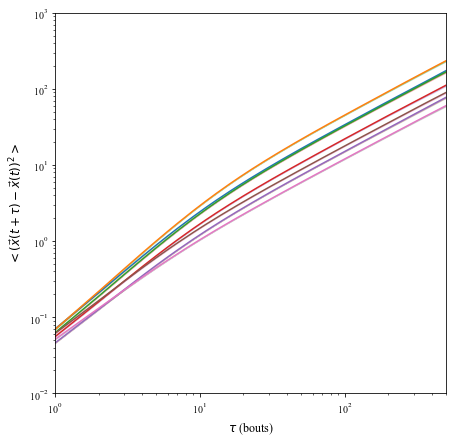

In [832]:
plt.figure(figsize=(7,7))

local_slopes =[]

for clus in [0,1,2,3,4,5,6]:
    print(clus)
    mean,cil,ciu = stats.bootstrap(mus_sim[clus],n_times=100, n_samples=len(mus_sim[clus]))
    local_slope = np.diff(np.log(mean))/np.diff(np.log(lags))
    local_slopes.append(local_slope)
    plt.plot(lags[1:],mean[1:],c='C{}'.format(clus))
    plt.fill_between(lags[1:],cil[1:],ciu[1:],alpha=.3,color='C{}'.format(clus+1))

# plt.plot(lags[1:], 0.07*lags[1:]**1.5,c='k',ls='--')
# plt.plot(lags[1:], 0.3*lags[1:]**1.,c='gray',ls='--')
plt.xlim(1,500)
plt.ylim(0.01,1000)
plt.xscale('log')
plt.yscale('log')
# plt.ylim(0.1,1.25**2)
# plt.xlim(0,15)
plt.xlabel(r'$\tau$ (bouts)',fontsize=12)
plt.ylabel(r'$<(\vec{x}(t+\tau)-\vec{x}(t))^2>$',fontsize=12)
plt.savefig('/Users/gautam.sridhar/Documents/ZENITH/Figures/Suppl8/MSD_groups.pdf')
# plt.legend()
# plt.axis('equal')
plt.show()

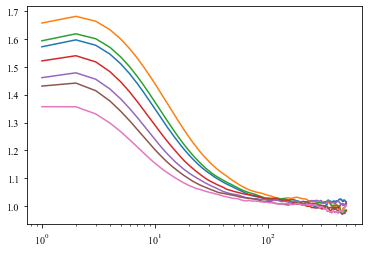

In [833]:
for i in range(7):
    plt.plot(local_slopes[i])
plt.xscale('log')
plt.show()

In [807]:
#body length_regime - for exploration
rmin=0.8
maxR = 100.
dr= .4
xrange,yrange,rads = sfs.get_bins(dr,maxR)

In [808]:
dist_range = np.logspace(np.log10(rmin),np.log10(maxR),50)
# dist_range = np.linspace(rmin, maxR,30)
# dist_range = np.arange(rmin, maxR,2*dr)
print(len(dist_range))
# print(drs)

50


In [809]:
ac_samples_group = []
for clus in [0,1,2,3,4,5,6]:
    print(clus)
    ac_samples= np.zeros((n_sims,len(dist_range)))
    for k in range(n_sims):
        ksim=np.random.randint(0,n_sims)
        xy_all = sims_gs_X_trajs[clus][ksim]
        freqs,_,_= np.histogram2d(xy_all[:,0],xy_all[:,1],bins=[xrange,yrange])
        for kd,ds in enumerate(dist_range):
            sel = rads<=ds
            ac_samples[k,kd] = (freqs.T[sel]>0).sum()/sel.sum()
    ac_samples_group.append(ac_samples)
#     mean,cil,ciu = stats.bootstrap(ac_samples,n_times=100)
#     plt.fill_between(dist_range,cil,ciu,alpha=.5)
# plt.yscale('log')
# plt.xscale('log')

0
1
2
3
4
5
6


In [810]:
ac_samples_group = np.asarray(ac_samples_group)

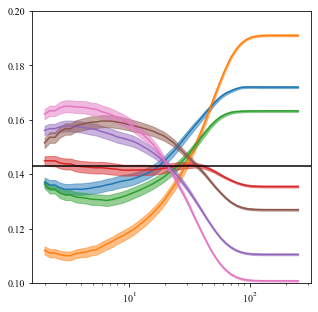

In [812]:
plt.figure(figsize=(5,5))
for clus in [0,1,2,3,4,5,6]:
    ac_samples = (ac_samples_group/np.sum(ac_samples_group,axis=0))[clus]
    mean,cil,ciu = stats.bootstrap(ac_samples,n_times=1000, n_samples=len(ac_samples))
    plt.plot(dist_range/0.4,mean, c='C{}'.format(clus))
    plt.fill_between(dist_range/0.4,cil,ciu,alpha=.5, color='C{}'.format(clus))
plt.axhline(1/7,c='k')
# mean,cil,ciu = stats.bootstrap(ac_avg_fish,n_times=100)
# plt.plot(dist_range/0.4,mean,c='k')
# plt.fill_between(dist_range/0.4,cil,ciu,alpha=.5,color='k')
plt.ylim(0.10,.2)
# plt.xlim(0,3)
plt.xscale('log')
# plt.yscale('log')
plt.savefig('/Users/gautam.sridhar/Documents/ZENITH/Figures/Fig6/p_res_gs_gen.pdf')

In [826]:
# Smaller than body length regime - for Prey Capture
rmin=0.0
maxR = .2
dr= .02
# xrange,yrange,rads = get_bins(dr,maxR)
xrange,yrange,rads,angs = sfs.get_bins_angs(dr,maxR)
psi_range = np.array([-np.pi/6, np.pi/6])
sel1 = angs >= psi_range.min()
sel2 = angs <= psi_range.max()
sel = np.logical_and(sel1,sel2)

ac_samples_group = []

for clus in [0,1,2,3,4,5,6]:
    print(clus)
    ac_samples= np.zeros((n_sims,))
    for k in range(n_sims):
        ksim=np.random.randint(0,n_sims)
        xy_all = sims_gs_X_trajs[clus][ksim]
        vec0 = xy_all[1] - xy_all[0]
        psi0 = np.arctan2(vec0[1],vec0[0])
        xy_all = xy_all[1:]-xy_all[1]
        xy_all_ = np.dot(xy_all,sfs.rot(psi0))
        freqs,_,_= np.histogram2d(xy_all_[:20,0],xy_all_[:20,1],bins=[xrange,yrange])
        ac_samples[k] = (freqs.T[sel]>0).sum()/sel.sum()
    ac_samples_group.append(ac_samples)

ac_samples_group = np.asarray(ac_samples_group)

0
1
2
3
4
5
6


In [827]:
# plt.figure(figsize=(5,5))
means = []
cus = []
clls = []
for clus in [0,1,2,3,4,5,6]:
    print(clus)
    ac_samples = (ac_samples_group/np.sum(ac_samples_group,axis=0))[clus]
    ac_samples = ma.masked_invalid(ac_samples)
    mean,cil,ciu = stats.bootstrap(ac_samples,n_times=1000, n_samples=len(ac_samples))
    means.append(mean)
    clls.append(cil)
    cus.append(ciu)

0


<ipython-input-827-761ddd86f44c>:7: RuntimeWarning: invalid value encountered in true_divide
  ac_samples = (ac_samples_group/np.sum(ac_samples_group,axis=0))[clus]
/Users/gautam.sridhar/zilo/lib/python3.8/site-packages/numpy/ma/core.py:2825: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


1
2
3
4
5
6


In [828]:
print(means)
print(clls)
print(cus)

[0.11548535878799586, 0.10677221016275014, 0.12879238221431605, 0.14119274056486278, 0.1816384019450156, 0.14440248428841984, 0.18171642203663968]
[masked_array(data=[0.10943637370482918],
             mask=[False],
       fill_value=1e+20), masked_array(data=[0.10091458484296446],
             mask=[False],
       fill_value=1e+20), masked_array(data=[0.12235191978206966],
             mask=[False],
       fill_value=1e+20), masked_array(data=[0.13458523599058317],
             mask=[False],
       fill_value=1e+20), masked_array(data=[0.17495203741194676],
             mask=[False],
       fill_value=1e+20), masked_array(data=[0.13808057803583965],
             mask=[False],
       fill_value=1e+20), masked_array(data=[0.1749008243264861],
             mask=[False],
       fill_value=1e+20)]
[masked_array(data=[0.12119371238355536],
             mask=[False],
       fill_value=1e+20), masked_array(data=[0.11217505770994142],
             mask=[False],
       fill_value=1e+20), masked

(0.05, 0.25)

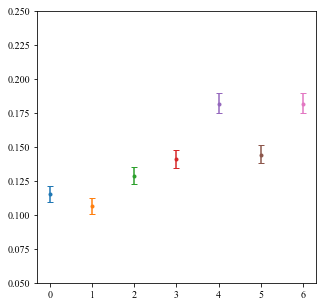

In [829]:
cus = ma.hstack(cus)
clls = ma.hstack(clls)
means = ma.hstack(means)
fig,ax = plt.subplots(1,1,figsize=(5,5))
for clus in [0,1,2,3,4,5,6]:
    m = means[clus]
    cil = clls[clus]
    ciu = cus[clus]
    ax.errorbar(clus, m, [[m - cil],[ciu-m]],fmt='.', capsize=3,  color='C{}'.format(clus))
plt.ylim(0.05,0.25)
# plt.savefig('/Users/gautam.sridhar/Documents/ZENITH/Figures/Fig6/p_res_gs_pc.pdf')

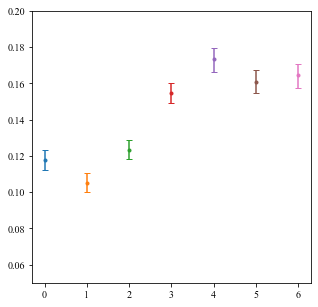

In [790]:
cus = ma.hstack(cus)
clls = ma.hstack(clls)
means = ma.hstack(means)
fig,ax = plt.subplots(1,1,figsize=(5,5))
for clus in [0,1,2,3,4,5,6]:
    m = means[clus]
    cil = clls[clus]
    ciu = cus[clus]
    ax.errorbar(clus, m, [[m - cil],[ciu-m]],fmt='.', capsize=3,  color='C{}'.format(clus))
plt.ylim(0.05,0.2)
# plt.savefig('/Users/gautam.sridhar/Documents/ZENITH/Figures/Fig6/p_res_gs_pc.pdf')